<a href="https://colab.research.google.com/github/Tom4c3/Lifegame/blob/main/%E3%83%A9%E3%82%A4%E3%83%95%E3%82%B2%E3%83%BC%E3%83%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ライフゲーム
これを実行していくと簡単にライフゲームが実行できます．
最初に左側にあるフォルダマークをひらいて，自分のドライブをマウントしよう．
そのあとで，コードをおきたいフォルダまでのパスを決めます．そのパスを path に指定しているのが下のセル(かたまり)にあるコードです．
そのあと，%cd でフォルダを移動して，その下でgit cloneしています．pathを編集後，左にカーソルをもってきて再生マークをおして実行してみよう．

またcloneしたフォルダにおりるためもういちど2番目のセルで %cd を実行します．
cloneしてとってきたコードを単に実行したいときは3番目のセルを実行してください．しばらくまつとpngファイルが大量にできているとおもいます．

3番目のセルのやつだとバラバラのファイルしかできないので実行しません．それをつなげるためにちょっと改編したコードが4番目のセルです．こちらを実行すると，大量のpngとともにanimation gifを生成します．

あそんでみよう．

In [5]:
from google.colab import drive
drive.mount('/content/drive')
#https://qiita.com/kurilab/items/f6f4374d7b1980060de7
%cd /content/drive/My Drive/ai/
!git clone https://github.com/ctjacobs/game-of-life.git

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ai
fatal: destination path 'game-of-life' already exists and is not an empty directory.


In [6]:
%cd /content/drive/My Drive/ai/game-of-life

/content/drive/My Drive/ai/game-of-life


In [ ]:
!python game-of-life.py

  File "game-of-life.py", line 75
    print "At time level %d" % t
                           ^
SyntaxError: Missing parentheses in call to 'print'. Did you mean print("At time level %d" % t)?


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ai/game-of-life


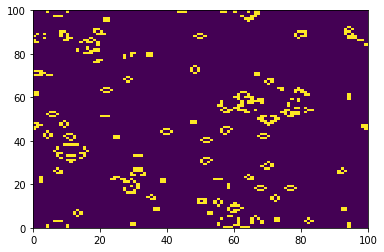

In [7]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/ai'
%cd /content/drive/My Drive/ai/game-of-life
#!/usr/bin/env python

#  An implementation of Conway's Game of Life in Python.

#  Copyright (C) 2013 Christian Jacobs.

#  This program is free software: you can redistribute it and/or modify
#  it under the terms of the GNU General Public License as published by
#  the Free Software Foundation, either version 3 of the License, or
#  (at your option) any later version.

#  This program is distributed in the hope that it will be useful,
#  but WITHOUT ANY WARRANTY; without even the implied warranty of
#  MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#  GNU General Public License for more details.

#  You should have received a copy of the GNU General Public License
#  along with this program.  If not, see <http://www.gnu.org/licenses/>.

import numpy
import pylab
import random

class GameOfLife:

   def __init__(self, N=100, T=200):
      """ Set up Conway's Game of Life. """
      # Here we create two grids to hold the old and new configurations.
      # This assumes an N*N grid of points.
      # Each point is either alive or dead, represented by integer values of 1 and 0, respectively.
      self.N = N
      self.old_grid = numpy.zeros(N*N, dtype='i').reshape(N,N)
      self.new_grid = numpy.zeros(N*N, dtype='i').reshape(N,N)
      self.T = T # The maximum number of generations

      # Set up a random initial configuration for the grid.
      for i in range(0, self.N):
         for j in range(0, self.N):
            if(random.randint(0, 100) < 15):
               self.old_grid[i][j] = 1
            else:
               self.old_grid[i][j] = 0
      
   def live_neighbours(self, i, j):
      """ Count the number of live neighbours around point (i, j). """
      s = 0 # The total number of live neighbours.
      # Loop over all the neighbours.
      for x in [i-1, i, i+1]:
         for y in [j-1, j, j+1]:
            if(x == i and y == j):
               continue # Skip the current point itself - we only want to count the neighbours!
            if(x != self.N and y != self.N):
               s += self.old_grid[x][y]
            # The remaining branches handle the case where the neighbour is off the end of the grid.
            # In this case, we loop back round such that the grid becomes a "toroidal array".
            elif(x == self.N and y != self.N):
               s += self.old_grid[0][y]
            elif(x != self.N and y == self.N):
               s += self.old_grid[x][0]
            else:
               s += self.old_grid[0][0]
      return s

   def play(self):
      """ Play Conway's Game of Life. """
      # Write the initial configuration to file.
      pylab.pcolormesh(self.old_grid)
      #pylab.colorbar()
      #pylab.savefig(path+"generation000.png")

      t = 1 # Current time level
      write_frequency = 5 # How frequently we want to output a grid configuration.
      while t <= self.T: # Evolve!
         #print ("At time level %d" % t)

         # Loop over each cell of the grid and apply Conway's rules.
         for i in range(self.N):
            for j in range(self.N):
               live = self.live_neighbours(i, j)
               if(self.old_grid[i][j] == 1 and live < 2):
                  self.new_grid[i][j] = 0 # Dead from starvation.
               elif(self.old_grid[i][j] == 1 and (live == 2 or live == 3)):
                  self.new_grid[i][j] = 1 # Continue living.
               elif(self.old_grid[i][j] == 1 and live > 3):
                  self.new_grid[i][j] = 0 # Dead from overcrowding.
               elif(self.old_grid[i][j] == 0 and live == 3):
                  self.new_grid[i][j] = 1 # Alive from reproduction.

        #画像の保存はいらない生成だけとかできないのかな
         # Output the new configuration.
         if(t % write_frequency == 0):
            pylab.pcolormesh(self.new_grid)
            pylab.savefig("generation%03d.png" % t)

            #pylab.show()
            #https://gammasoft.jp/blog/python-string-format/

         # The new configuration becomes the old configuration for the next generation.
         self.old_grid = self.new_grid.copy()

         # Move on to the next time level
         t += 1

if(__name__ == "__main__"):
   game = GameOfLife(N = 100, T = 200)
   game.play()
   from PIL import Image

   import glob

  #画像をまとめてgifにする
   files = sorted(glob.glob('./*.png'))  
   images = list(map(lambda file : Image.open(file) , files))
   images[0].save('image.gif' , save_all = True , append_images = images[1:] , duration = 400 , loop = 0)